# Songs Lyrics Sentimental Analysis

In [2]:
import os
from IPython.display import display,clear_output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

import textblob
from textblob import TextBlob

from wordcloud import WordCloud

import sklearn
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
attr_lyrics_dataset_path = r'../archive/songs_with_attributes_and_lyrics.csv'
# timestep_lyrics_dataset_path = r'archive/songs_with_lyrics_and_timestamps.csv'

dataset1 = pd.read_csv(attr_lyrics_dataset_path)
# dataset2 = pd.read_csv(timestep_lyrics_dataset_path)

In [ ]:
dataset1.info()

In [ ]:
dataset1.head(10)

In [ ]:
dataset1.isna().sum()

In [ ]:
dataset1 = dataset1.dropna(subset=['name','lyrics'])

In [ ]:
dataset1.isna().sum()

In [ ]:
dataset1['artists'].value_counts()

In [ ]:
dataset1['artists'].value_counts()

In [ ]:
dataset1['lyrics']

In [ ]:
# preprocessing the lyrics
# lower the string
# tokenise the words
# remove punctuations
# remove stopwords
# stem the words

lyrics_corpus = []

lemmatiser = WordNetLemmatizer()

translator = str.maketrans('','',string.punctuation)

def preprocess(lyrics):
    lyrics = lyrics.lower()
    # remove punctuations using translation table
    clean_lyrics = lyrics.translate(translator)
    tokenised_words = word_tokenize(clean_lyrics)
    filtered_words = [word for word in tokenised_words if word not in stopwords.words('english')]
    stemmed_words = [lemmatiser.lemmatize(word) for word in filtered_words]
    lyrics = ' '.join(stemmed_words)
    lyrics = lyrics.replace('\n','')
    return lyrics

for row in dataset1['lyrics']:
    new_row = preprocess(row)
    lyrics_corpus.append(new_row)

In [ ]:
dataset1['cleaned_lyrics'] = lyrics_corpus

In [ ]:
polarity_score = []
subjectivity_score = []
for lyrics in lyrics_corpus:
    blob = TextBlob(lyrics)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarity_score.append(polarity)
    subjectivity_score.append(subjectivity)

In [ ]:
dataset1['polarity_score'] = polarity_score
dataset1['subjectivity_score'] = subjectivity_score

In [ ]:
dataset1.to_csv('../archive/modified_dataset.csv')

# Experimental Analysis

In [ ]:
dataset1 = pd.read_csv('../archive/modified_dataset.csv')

In [ ]:
most_common_words = []
for lyrics in dataset1['cleaned_lyrics']:
    try:
        clear_output(wait=True)
        tokenised_words = word_tokenize(lyrics)
        fdist = FreqDist(tokenised_words)
        common_words = fdist.most_common(10)
        display(common_words)
        most_common_words.append(common_words)
    except Exception as e:
        most_common_words.append(pd.NaT)

In [ ]:
dataset1['most_common_words'] = most_common_words

In [ ]:
dataset1.to_csv('../archive/modified_dataset.csv')

In [18]:
dataset1 = pd.read_csv('../archive/modified_dataset.csv')
# separating song records of d4vd
dataset1[dataset1['artists'] == 'd4vd'].to_csv('d4vd_song_records.csv',index=False)
# separating song records of Ariana Grande
dataset1[dataset1['artists'] == 'Ariana Grande'].to_csv('ariana_grande_song_records.csv',index = False)
# separating song records of atlas in motion
dataset1[dataset1['artists'] == 'Atlas in Motion'].to_csv('atlas_in_motion_song_records.csv',index = False)
# separating song records of beach bunny
dataset1[dataset1['artists'] == 'Beach Bunny'].to_csv('beach_bunny_song_records.csv',index=False)

In [16]:
d4vd_dataset = pd.read_csv('d4vd_song_records.csv')
ariana_grande_dataset = pd.read_csv('ariana_grande_song_records.csv')
atlas_in_motion_dataset = pd.read_csv('atlas_in_motion_song_records.csv')
beach_bunny_dataset = pd.read_csv('beach_bunny_song_records.csv')

In [10]:
d4vd_dataset

Unnamed: 0.1  Unnamed: 0                      id            name  \
0        195288      195292  0X0V9wIUr47ZqbFqLfZqX5   Dirty Secrets   
1        679530      679541  4WekxJLRjVgjMo1JiZr0uR        Separate   
2        913222      913237  1MRnyqgA3P1T5Dw72lfZLm       You and I   
3        924712      924727  3HKT8s5kZ4NevGmgnm8rvt  life’s a dream   

   album_name artists  danceability  energy  key  loudness  ...  \
0         NaN    d4vd         0.416   0.813   11    -9.742  ...   
1         NaN    d4vd         0.648   0.515    4   -13.009  ...   
2         NaN    d4vd         0.474   0.919   10    -5.702  ...   
3         NaN    d4vd         0.423   0.167    4   -19.820  ...   

   instrumentalness  liveness  valence    tempo  duration_ms  \
0            0.4160    0.4820   0.8420  175.007     155317.0   
1            0.0022    0.1240   0.1910  140.377     109341.0   
2            0.9450    0.3410   0.4450   90.225     151695.0   
3            0.8970    0.0913   0.0421  119.807     130541.0   

                                              lyrics  \
0  I know\n The dirty secrets that you keep\n And...   
1  Nina got a choppa with a K\n If I say I love y...   
2  I dream about you and I\n But why do I even tr...   
3  If life's a dream, then why haven't I woken up...   

                                      cleaned_lyrics  polarity_score  \
0  know dirty secret keep know cant hide ill figu...       -0.200893   
1  nina got choppa k say love day dont wan na tal...        0.150000   
2  dream even try cause youre running away runnin...        0.100000   
3  life dream havent woken yet mean truth fading ...       -0.312500   

  subjectivity_score                                  most_common_words  
0           0.608482  [('know', 10), ('want', 6), ('dont', 5), ('alw...  
1           0.227778  [('got', 6), ('choppa', 4), ('really', 4), ('s...  
2           0.422222  [('trying', 11), ('running', 10), ('away', 10)...  
3           0.687500  [('life', 3), ('dream', 3), ('see', 2), ('plea...  

[4 rows x 23 columns]

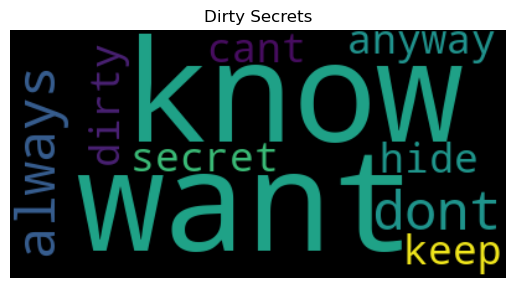

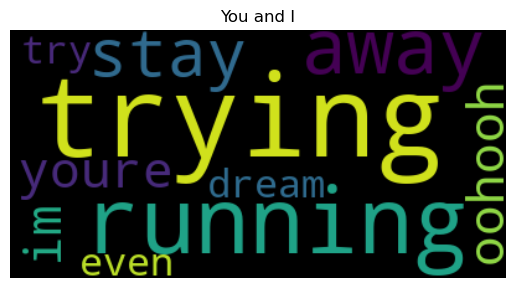

In [17]:
translator = str.maketrans('','',string.punctuation + string.digits)

common_words_filtered = []

os.makedirs('d4vd_wordcloud')

for name,common_words in zip(d4vd_dataset['name'],d4vd_dataset['most_common_words']):
    try:
        common_words = common_words.translate(translator)
        common_words_filtered.append(common_words)

        cloud = WordCloud().generate(common_words)
        plt.imshow(cloud , interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{name}")
        plt.savefig(f"d4vd_wordcloud/{name}.png",bbox_inches = 'tight')
        plt.show()
        plt.close()
    except Exception as e:
        print(e)

d4vd_dataset['most_common_words'] = common_words_filtered

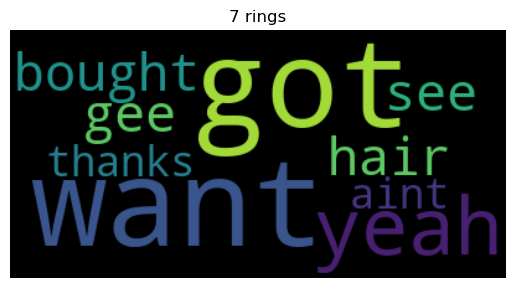

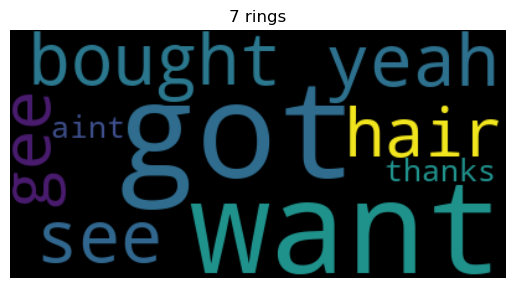

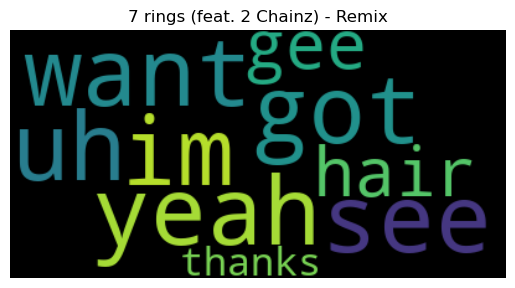

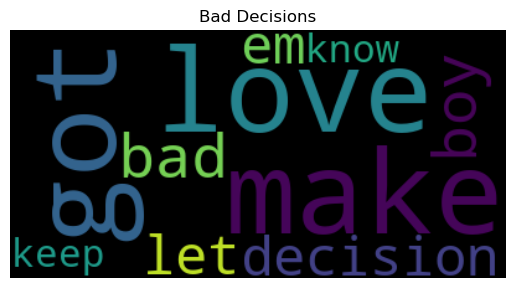

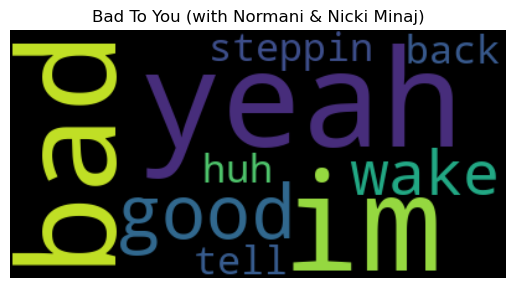

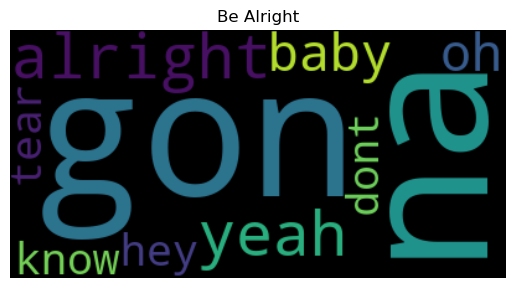

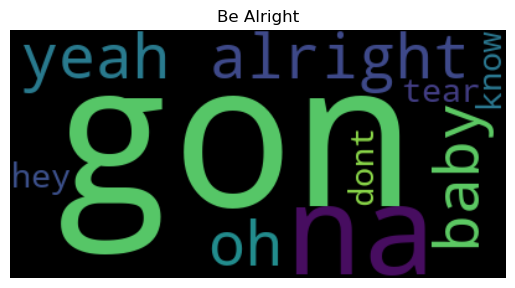

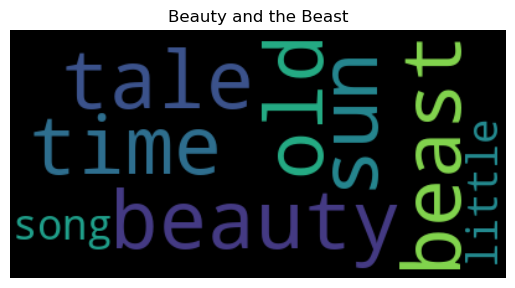

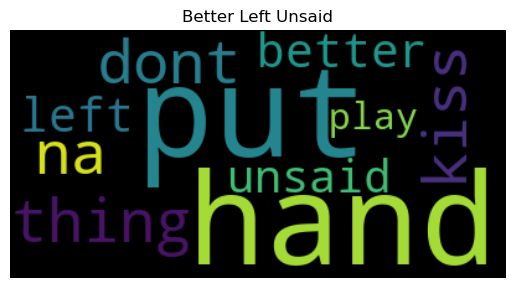

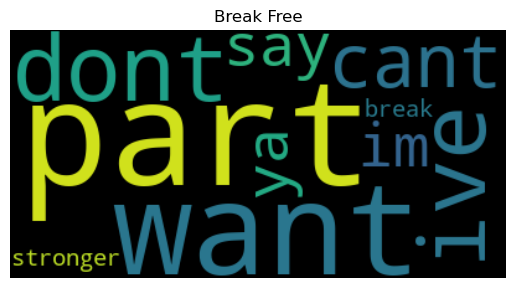

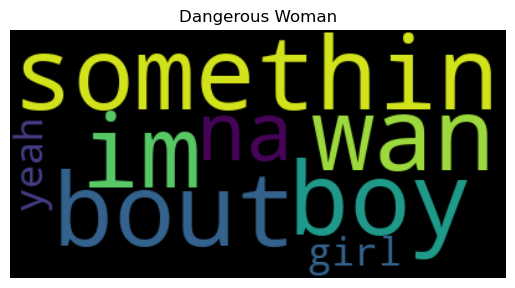

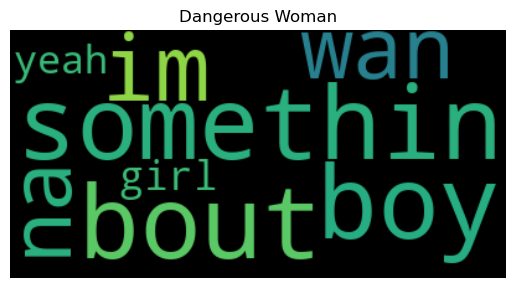

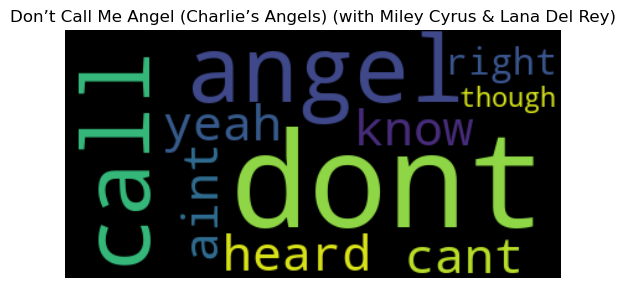

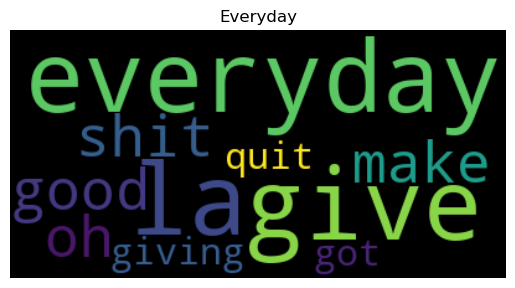

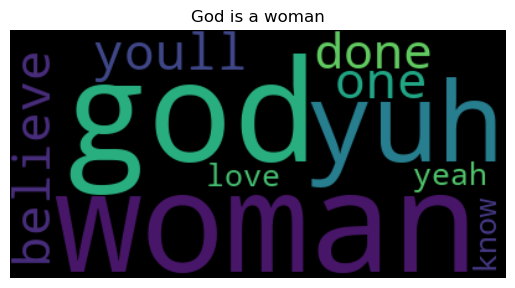

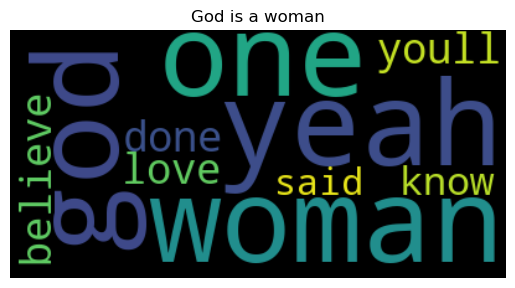

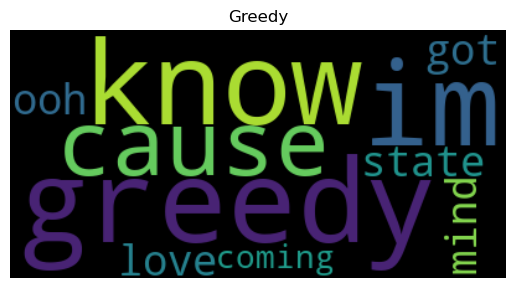

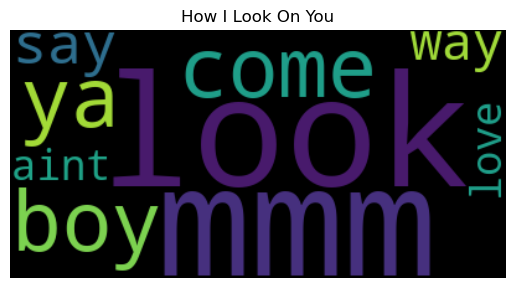

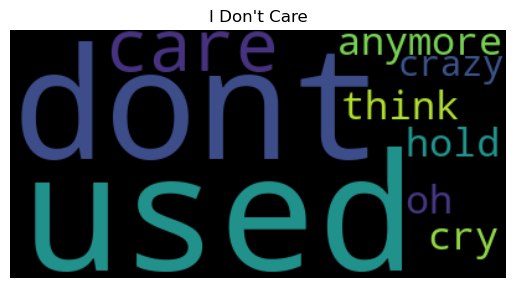

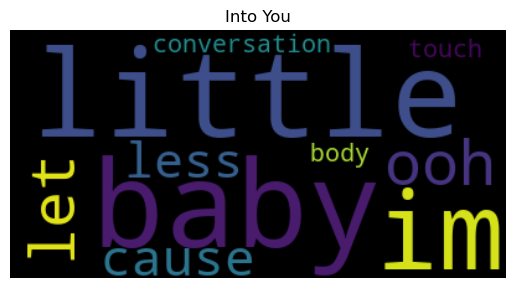

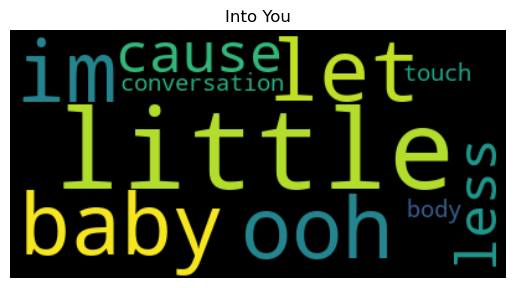

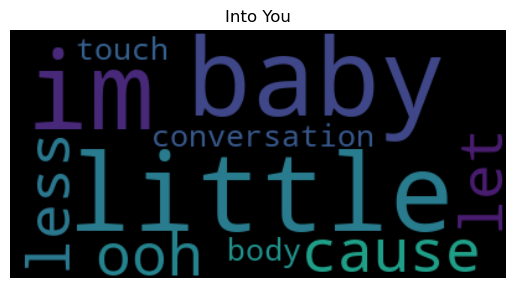

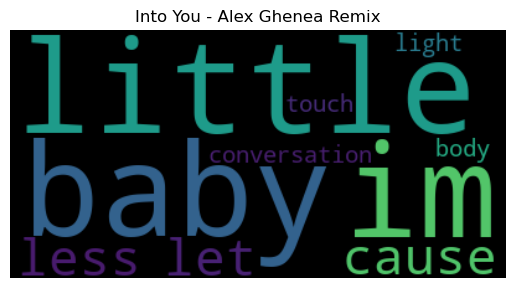

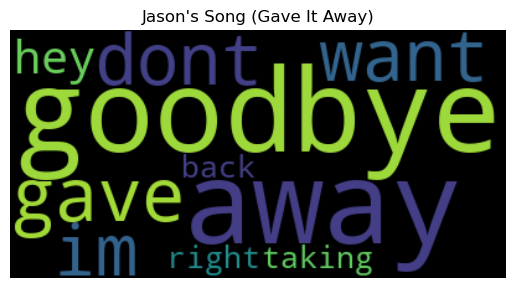

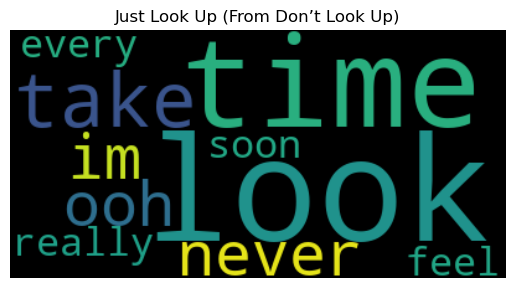

[Errno 2] No such file or directory: 'ariana_grande_wordcloud/Knew Better / Forever Boy.png'


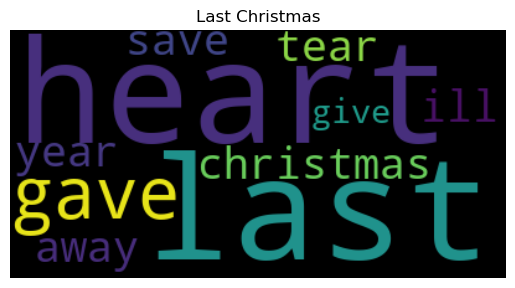

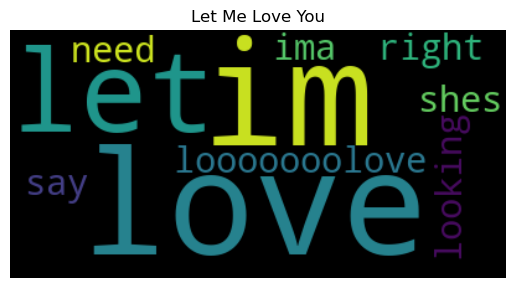

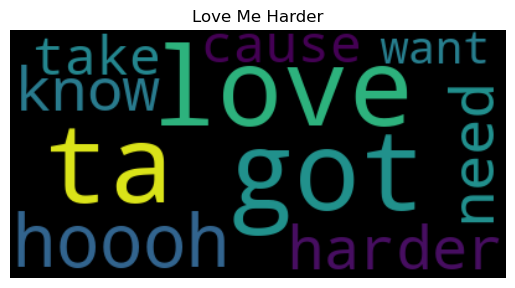

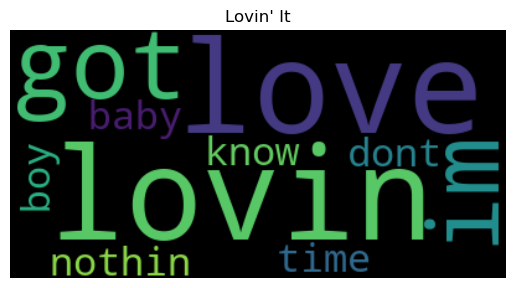

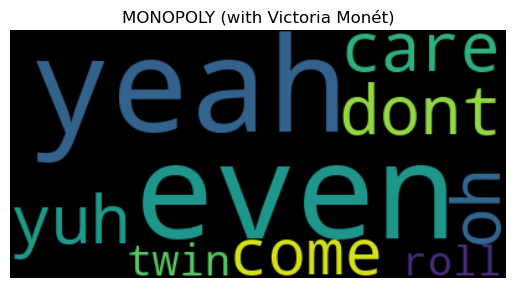

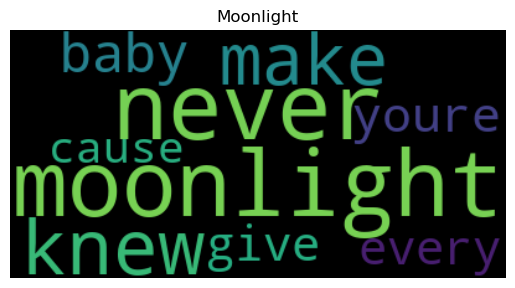

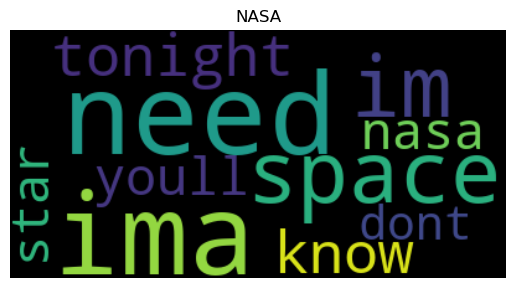

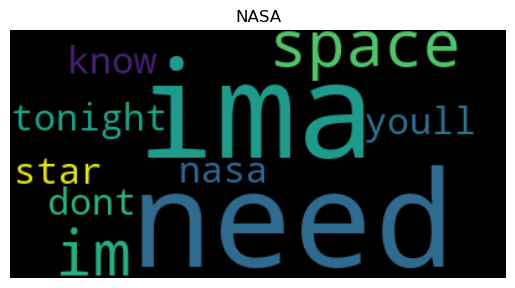

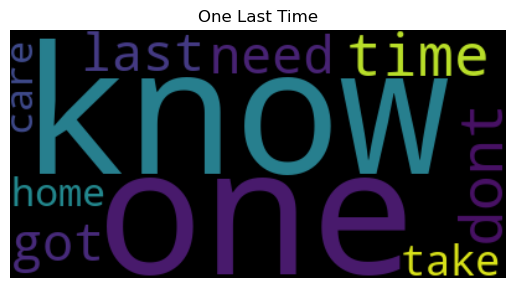

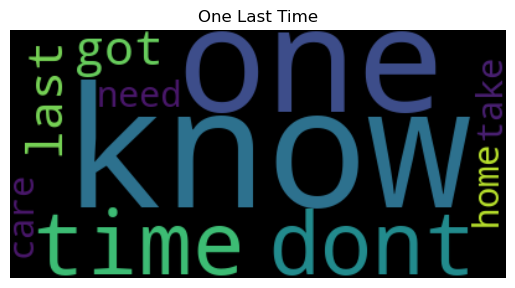

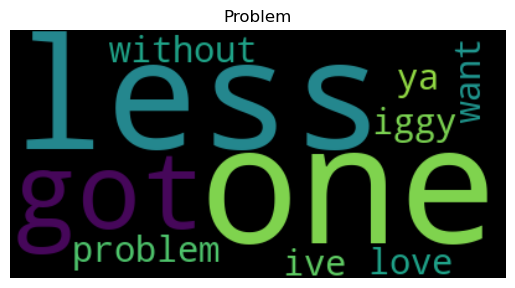

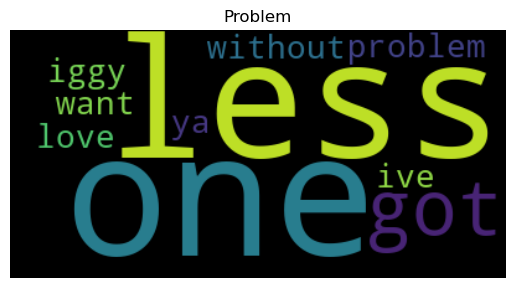

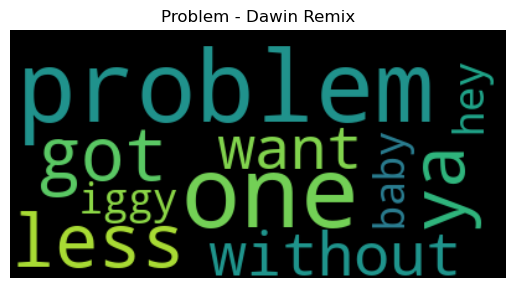

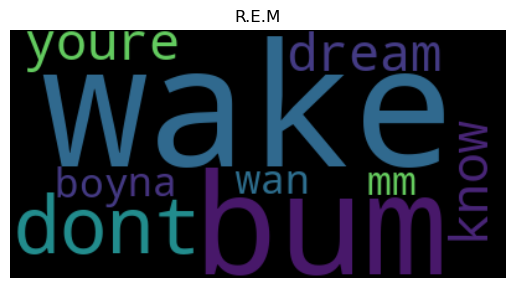

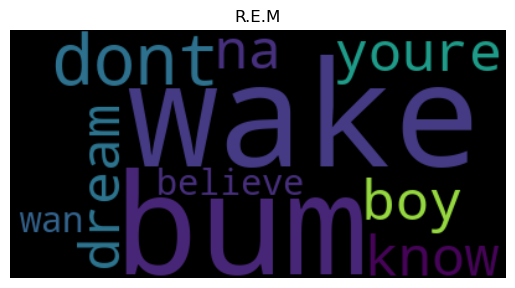

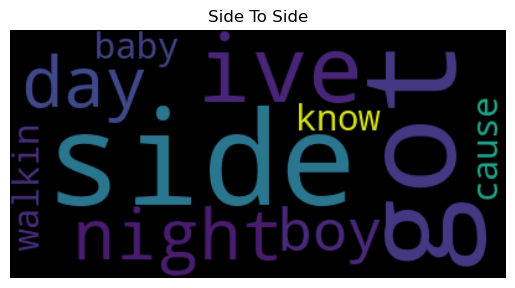

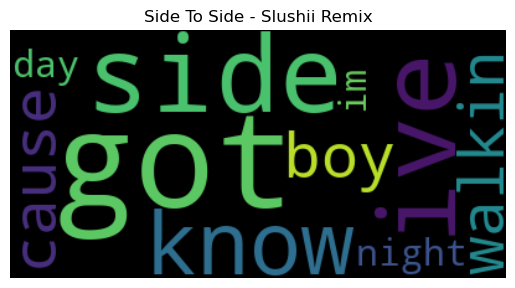

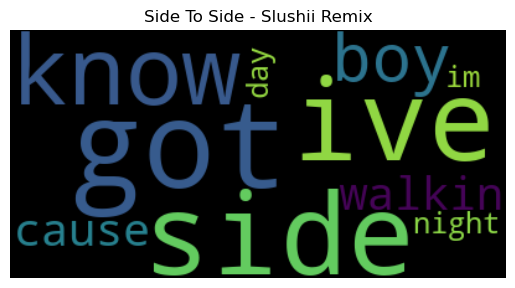

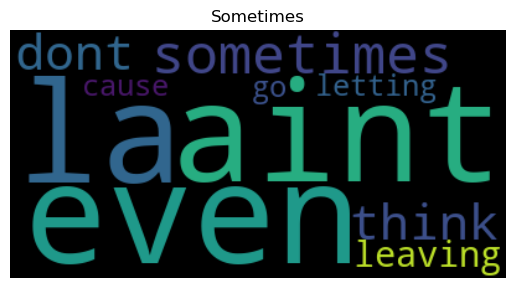

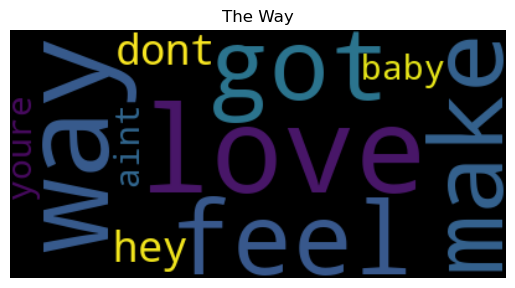

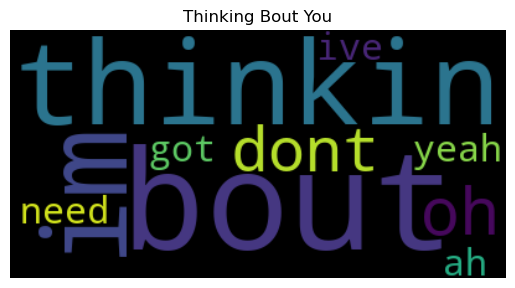

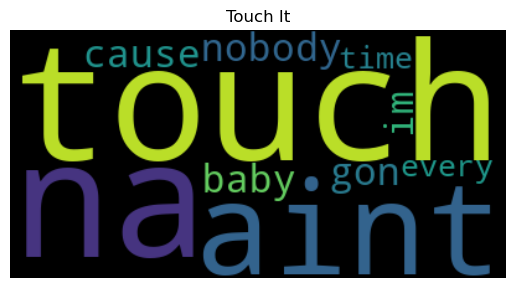

[Errno 22] Invalid argument: 'ariana_grande_wordcloud/Zero To Hero - From "Hercules".png'


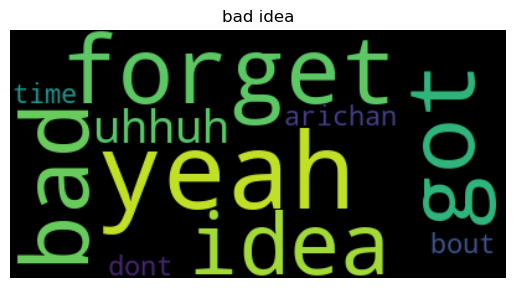

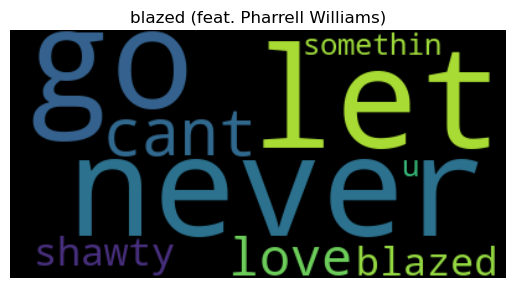

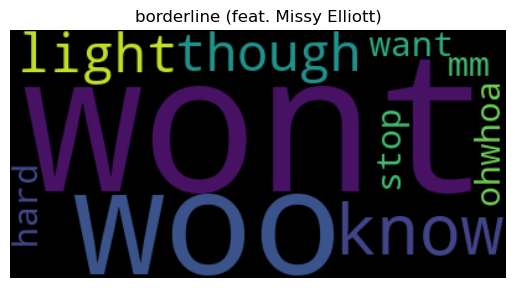

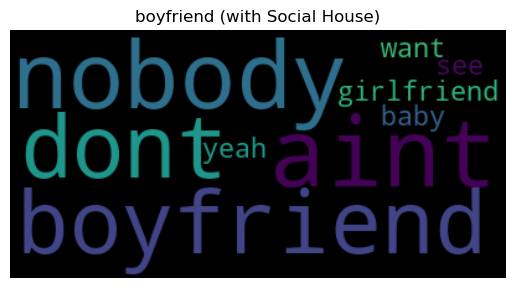

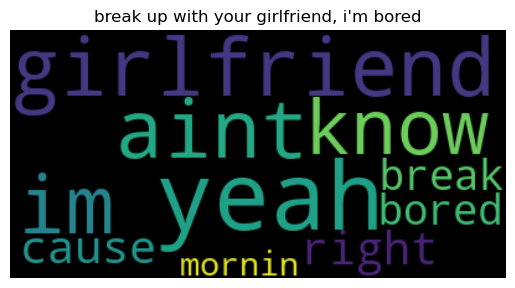

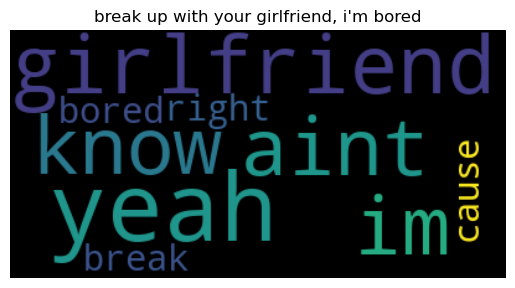

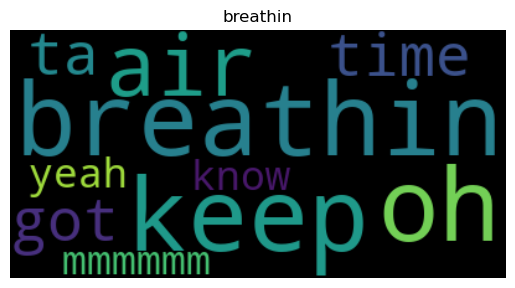

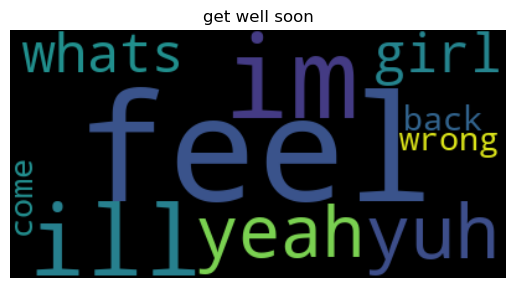

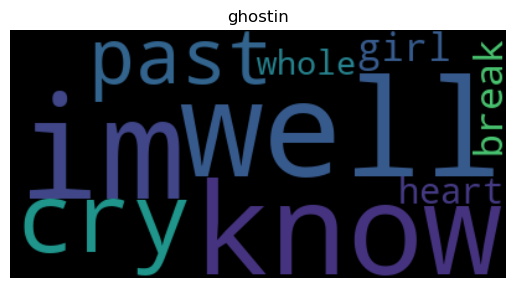

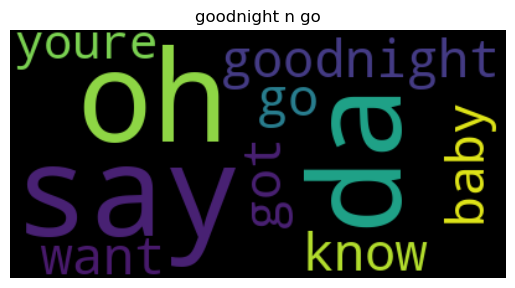

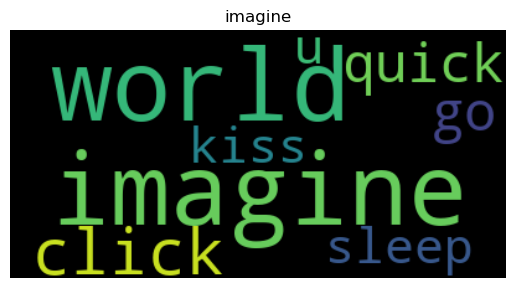

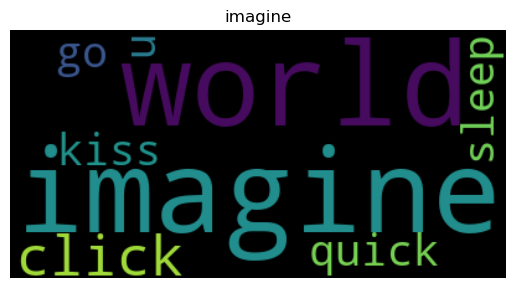

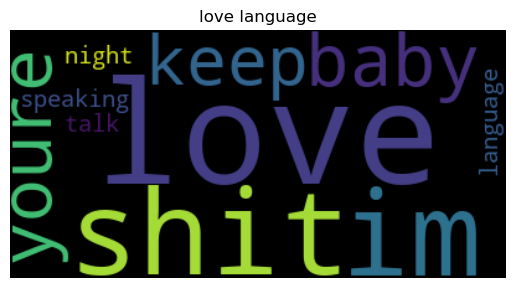

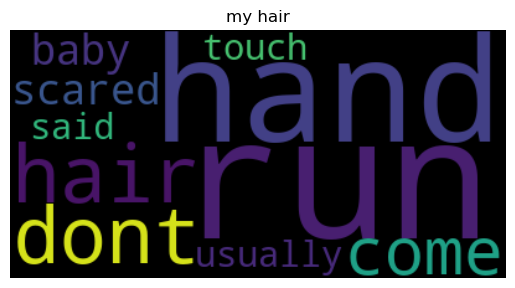

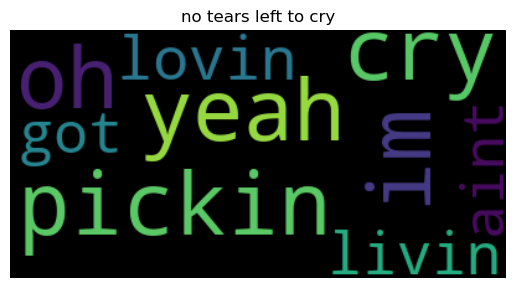

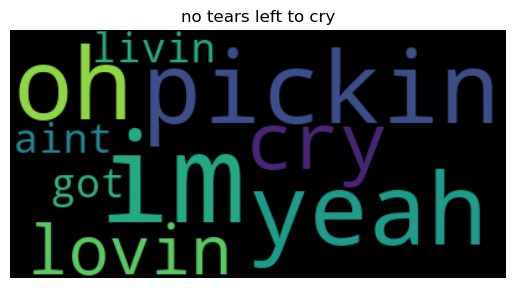

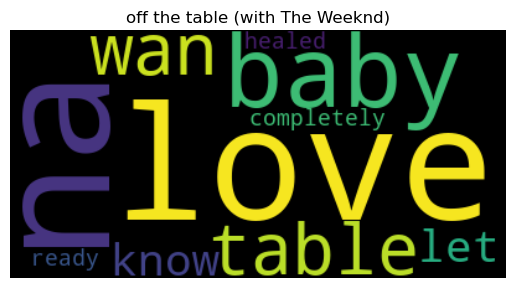

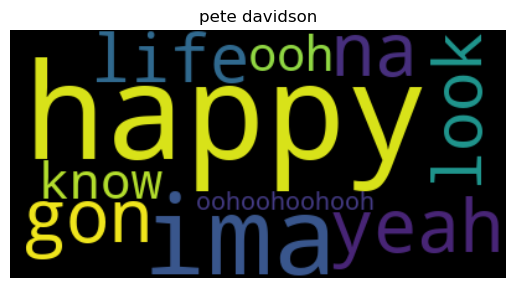

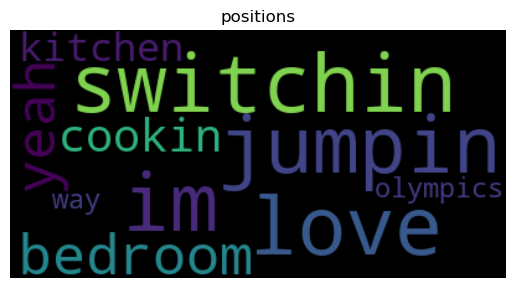

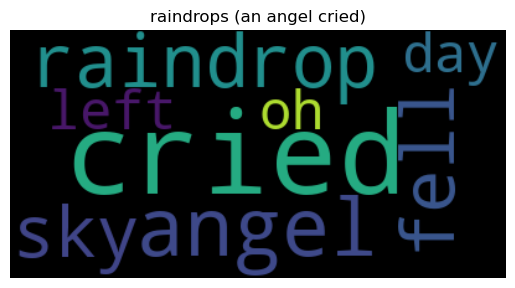

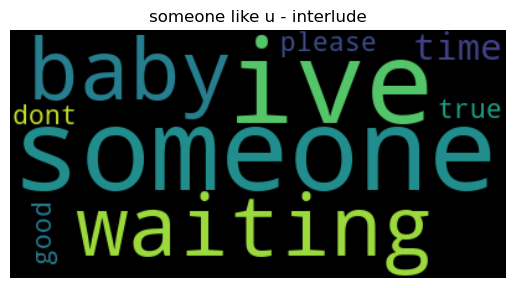

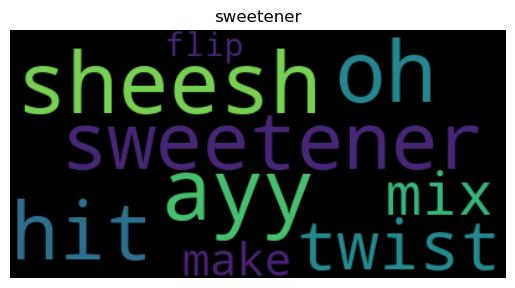

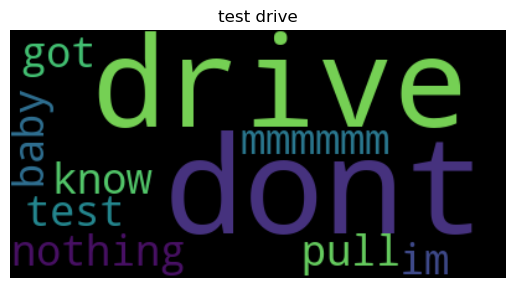

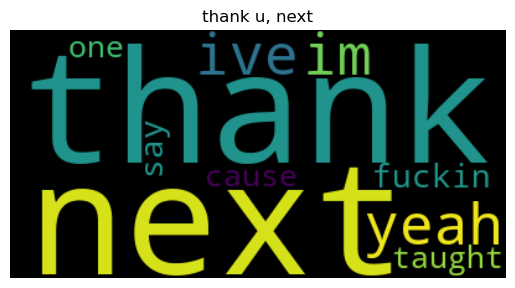

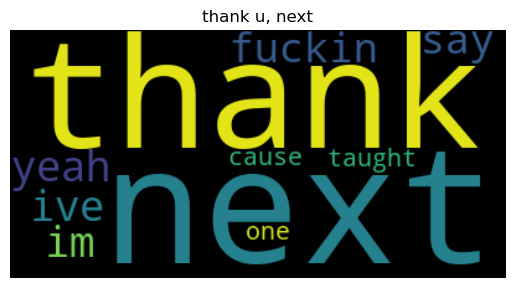

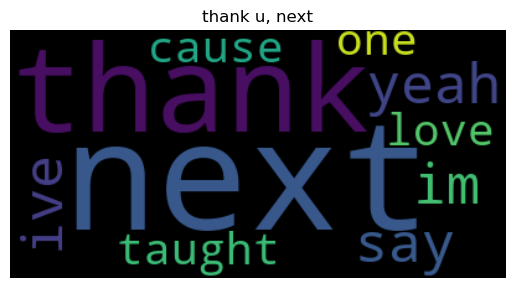

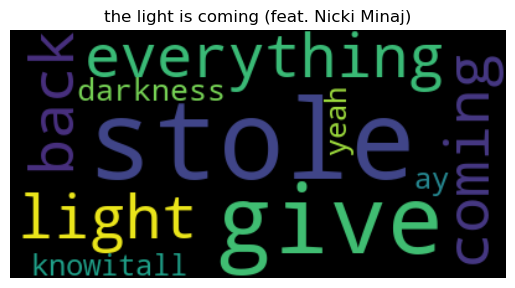

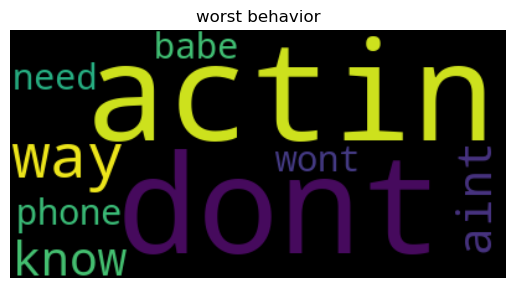

In [18]:
translator = str.maketrans('','',string.punctuation + string.digits)

common_words_filtered = []

os.makedirs('ariana_grande_wordcloud')

for name,common_words in zip(ariana_grande_dataset['name'],ariana_grande_dataset['most_common_words']):
    try:
        common_words = common_words.translate(translator)
        common_words_filtered.append(common_words)
        
        cloud = WordCloud().generate(common_words)
        plt.imshow(cloud , interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{name}")
        plt.savefig(f"ariana_grande_wordcloud/{name}.png",bbox_inches = 'tight')
        plt.show()
        plt.close()
    except Exception as e:
        print(e)

ariana_grande_dataset['most_common_words'] = common_words_filtered

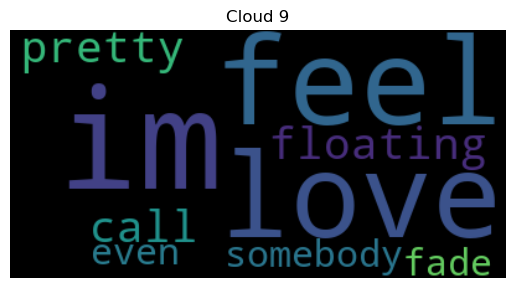

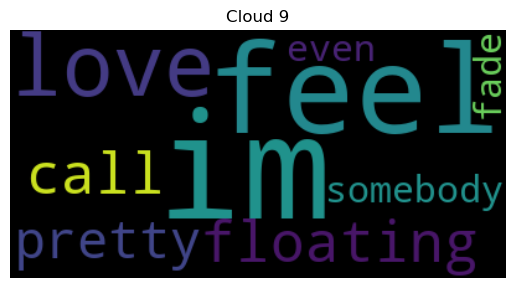

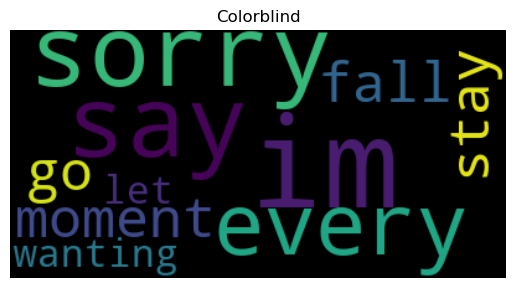

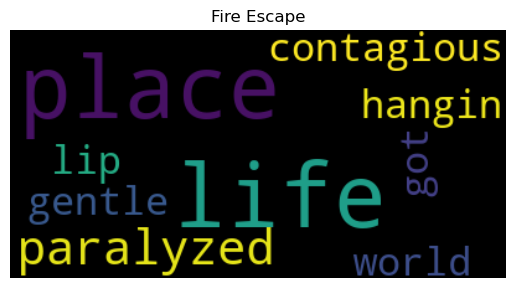

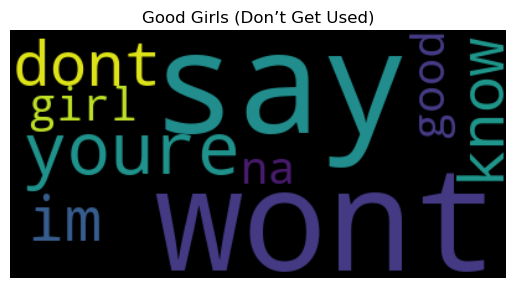

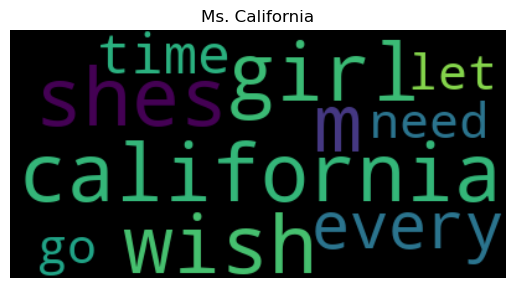

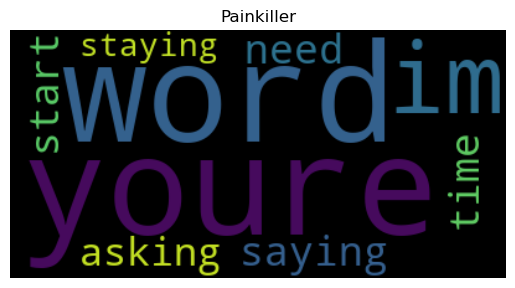

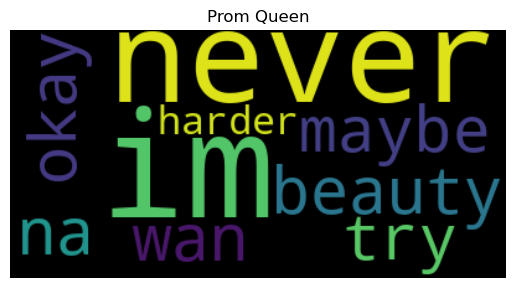

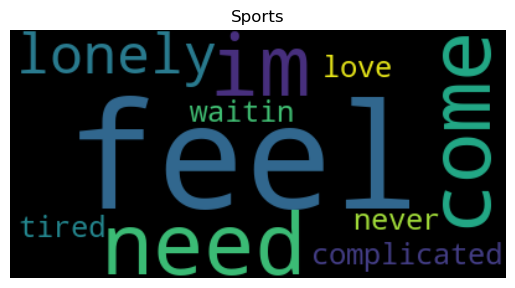

In [19]:
translator = str.maketrans('','',string.punctuation + string.digits)

common_words_filtered = []

os.makedirs('beach_bunny_wordcloud')

for name,common_words in zip(beach_bunny_dataset['name'],beach_bunny_dataset['most_common_words']):
    try:
        common_words = common_words.translate(translator)
        common_words_filtered.append(common_words)
        
        cloud = WordCloud().generate(common_words)
        plt.imshow(cloud , interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{name}")
        plt.savefig(f"beach_bunny_wordcloud/{name}.png",bbox_inches = 'tight')
        plt.show()
        plt.close()
    except Exception as e:
        print(e)

beach_bunny_dataset['most_common_words'] = common_words_filtered

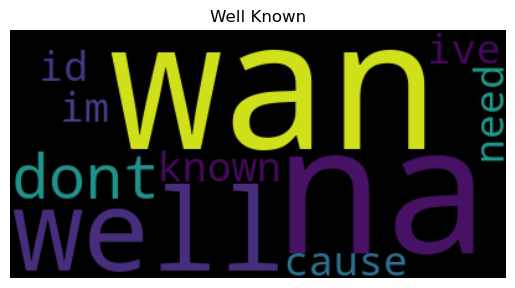

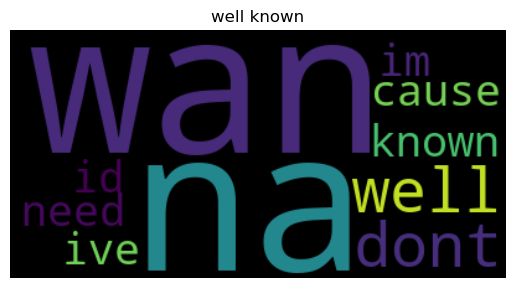

In [20]:
translator = str.maketrans('','',string.punctuation + string.digits)

common_words_filtered = []

os.makedirs('atlas_in_motion_wordcloud')

for name,common_words in zip(atlas_in_motion_dataset['name'],atlas_in_motion_dataset['most_common_words']):
    try:
        common_words = common_words.translate(translator)
        common_words_filtered.append(common_words)
        
        cloud = WordCloud().generate(common_words)
        plt.imshow(cloud , interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{name}")
        plt.savefig(f"atlas_in_motion_wordcloud/{name}.png",bbox_inches = 'tight')
        plt.show()
        plt.close()
    except Exception as e:
        print(e)

atlas_in_motion_dataset['most_common_words'] = common_words_filtered